In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_excel('../w5_storaging/6_naver_tv_100_2020_11_19.xlsx')
df.head()

,Title,Channel,View,Like
0,대학생이 되고 더 업그레이된 무대장악력! Dynamite 무대 공개☆,\n유 퀴즈 온 더 블럭\n,306319,2001
1,잠시만 안녕. 김호중 군복무전 마지막 무대 ＜배웅＞ㅣ김호중의파트너 EP.5,\n아무도 모르게 김호중의 파트너\n,438467,21624
2,레전드 무대 예약😍 임영웅 ‘그날들’ ♫,\n사랑의 콜센타\n,366749,26953
3,오자마자 덕담 주고받는 박미선&김구라 😈,\n라디오스타\n,105425,326
4,"[신곡 최초 공개] “언제 들어도 좋은 내 당신” 장윤정, 보고만 있어도 ＜좋은 당신＞",\n트롯신이 떴다\n,115915,917


In [4]:
change_delta = pd.read_csv('../w5_storaging/change_column.csv')
del change_delta['Unnamed: 0']
change_delta.fillna(0, inplace=True)

In [5]:
df = pd.concat([df, change_delta], axis=1)
df.head()

,Title,Channel,View,Like,Change,Delta
0,대학생이 되고 더 업그레이된 무대장악력! Dynamite 무대 공개☆,\n유 퀴즈 온 더 블럭\n,306319,2001,유지,0
1,잠시만 안녕. 김호중 군복무전 마지막 무대 ＜배웅＞ㅣ김호중의파트너 EP.5,\n아무도 모르게 김호중의 파트너\n,438467,21624,유지,0
2,레전드 무대 예약😍 임영웅 ‘그날들’ ♫,\n사랑의 콜센타\n,366749,26953,유지,0
3,오자마자 덕담 주고받는 박미선&김구라 😈,\n라디오스타\n,105425,326,유지,0
4,"[신곡 최초 공개] “언제 들어도 좋은 내 당신” 장윤정, 보고만 있어도 ＜좋은 당신＞",\n트롯신이 떴다\n,115915,917,상승,2


신규로 들어온 행들은 Delta(변화량)이 New로 들어와있다. 얘를 100 - 자기 랭크(인덱스)+ 1 로 하면 신규한테도 Delta를 줄 수 있지 않을까? 신규 97위면 100을 기준으로 101에서 4만큼 올라왔다고 볼 수도 있으니

In [6]:
df.index = df.index + 1

In [7]:
df.index.name = 'Rank'
df.head()

,Title,Channel,View,Like,Change,Delta
Rank,,,,,,
1,대학생이 되고 더 업그레이된 무대장악력! Dynamite 무대 공개☆,\n유 퀴즈 온 더 블럭\n,306319,2001,유지,0
2,잠시만 안녕. 김호중 군복무전 마지막 무대 ＜배웅＞ㅣ김호중의파트너 EP.5,\n아무도 모르게 김호중의 파트너\n,438467,21624,유지,0
3,레전드 무대 예약😍 임영웅 ‘그날들’ ♫,\n사랑의 콜센타\n,366749,26953,유지,0
4,오자마자 덕담 주고받는 박미선&김구라 😈,\n라디오스타\n,105425,326,유지,0
5,"[신곡 최초 공개] “언제 들어도 좋은 내 당신” 장윤정, 보고만 있어도 ＜좋은 당신＞",\n트롯신이 떴다\n,115915,917,상승,2


In [8]:
df.reset_index('Rank', inplace=True)
df

,Rank,Title,Channel,View,Like,Change,Delta
0,1,대학생이 되고 더 업그레이된 무대장악력! Dynamite 무대 공개☆,\n유 퀴즈 온 더 블럭\n,306319,2001,유지,0
1,2,잠시만 안녕. 김호중 군복무전 마지막 무대 ＜배웅＞ㅣ김호중의파트너 EP.5,\n아무도 모르게 김호중의 파트너\n,438467,21624,유지,0
2,3,레전드 무대 예약😍 임영웅 ‘그날들’ ♫,\n사랑의 콜센타\n,366749,26953,유지,0
3,4,오자마자 덕담 주고받는 박미선&김구라 😈,\n라디오스타\n,105425,326,유지,0
4,5,"[신곡 최초 공개] “언제 들어도 좋은 내 당신” 장윤정, 보고만 있어도 ＜좋은 당신＞",\n트롯신이 떴다\n,115915,917,상승,2
...,...,...,...,...,...,...,...
95,96,"[애프터게임] ""베어스 팬, 진짜 너무 사랑해요, 알러뷰!"" (11.18)",\n베어스포티비\n,3065,102,신규,NEW
96,97,"'압도적인 기량' 17살 황선우, 박태환 한국 기록 깼다",\nSBS뉴스\n,5539,2,신규,NEW
97,98,"#하이라이트#로맨스맛집, 구미호뎐! 대표 커플들의 러브라인 한번에 정리함 ☞ 솔로 ...",\n구미호뎐\n,5516,99,신규,NEW
98,99,역시 K-배달의 민족... 쿨하게 청와대로 택배 보내버린 조규태 자기님,\n유 퀴즈 온 더 블럭\n,13417,152,신규,NEW


In [9]:
df['Delta'] = df.apply(lambda r: (100 - r['Rank'] + 1) if r['Change'] == '신규' else r['Delta'],axis=1)

In [10]:
df.set_index('Rank', inplace = True)

In [11]:
df = df.reindex(columns=[
    'Channel',
    'Title',
    'Change',
    'Delta',
    'View',
    'Like'
])
df.head()

,Channel,Title,Change,Delta,View,Like
Rank,,,,,,
1,\n유 퀴즈 온 더 블럭\n,대학생이 되고 더 업그레이된 무대장악력! Dynamite 무대 공개☆,유지,0,306319,2001
2,\n아무도 모르게 김호중의 파트너\n,잠시만 안녕. 김호중 군복무전 마지막 무대 ＜배웅＞ㅣ김호중의파트너 EP.5,유지,0,438467,21624
3,\n사랑의 콜센타\n,레전드 무대 예약😍 임영웅 ‘그날들’ ♫,유지,0,366749,26953
4,\n라디오스타\n,오자마자 덕담 주고받는 박미선&김구라 😈,유지,0,105425,326
5,\n트롯신이 떴다\n,"[신곡 최초 공개] “언제 들어도 좋은 내 당신” 장윤정, 보고만 있어도 ＜좋은 당신＞",상승,2,115915,917


In [12]:
df.Channel = df.Channel.apply(lambda c:c.strip('\n'))

In [13]:
df

,Channel,Title,Change,Delta,View,Like
Rank,,,,,,
1,유 퀴즈 온 더 블럭,대학생이 되고 더 업그레이된 무대장악력! Dynamite 무대 공개☆,유지,0,306319,2001
2,아무도 모르게 김호중의 파트너,잠시만 안녕. 김호중 군복무전 마지막 무대 ＜배웅＞ㅣ김호중의파트너 EP.5,유지,0,438467,21624
3,사랑의 콜센타,레전드 무대 예약😍 임영웅 ‘그날들’ ♫,유지,0,366749,26953
4,라디오스타,오자마자 덕담 주고받는 박미선&김구라 😈,유지,0,105425,326
5,트롯신이 떴다,"[신곡 최초 공개] “언제 들어도 좋은 내 당신” 장윤정, 보고만 있어도 ＜좋은 당신＞",상승,2,115915,917
...,...,...,...,...,...,...
96,베어스포티비,"[애프터게임] ""베어스 팬, 진짜 너무 사랑해요, 알러뷰!"" (11.18)",신규,5,3065,102
97,SBS뉴스,"'압도적인 기량' 17살 황선우, 박태환 한국 기록 깼다",신규,4,5539,2
98,구미호뎐,"#하이라이트#로맨스맛집, 구미호뎐! 대표 커플들의 러브라인 한번에 정리함 ☞ 솔로 ...",신규,3,5516,99


In [14]:
df[df.Change == '신규'].reindex(columns=[
    'Change',
    'Delta',
    'Title',
    'Channel',
    'View',
    'Like'
])

,Change,Delta,Title,Channel,View,Like
Rank,,,,,,
20,신규,81,신라 고분 위 '30분 주차'…문화재보호법 위반 고발,JTBC뉴스,8706,1
29,신규,72,"[자막뉴스] 소름 돋는 구글의 예측, 심상치 않은 일본 코로나19 상황",뉴스는 YTN,8329,3
46,신규,55,"서울 일부 학교, 이틀간 '급식 중단'…되풀이되는 파업",JTBC뉴스,6653,1
54,신규,47,中서 넘어온 붉은 덩어리…천리안 2B호 영상 공개,SBS뉴스,5340,5
55,신규,46,"트럼프 변호사 ""뒤집기 불가""…퇴임 후엔 수사 직면",연합뉴스TV,5879,3
58,신규,43,소원 불만가득♨ 20만원 꽃다발에 급 과거 회상..😩,아내의 맛,69293,133
61,신규,40,"공수처장 추천위 '빈손'…여 ""법 개정"" vs 야 ""법치 파괴""",JTBC뉴스,4760,1
62,신규,39,[2020 포스트시즌] 겉잡을 수 없는 텐션 그 속에서 빛나는 동료애 (11.18),베어스포티비,3220,65
66,신규,35,백호 태몽을 꾼 바다 (ft. 영미의 🔞드립),라디오스타,9538,51


In [15]:
df[df.Change == '상승'].reindex(columns=[
    'Change',
    'Delta',
    'Title',
    'Channel',
    'View',
    'Like'
])

,Change,Delta,Title,Channel,View,Like
Rank,,,,,,
5,상승,2,"[신곡 최초 공개] “언제 들어도 좋은 내 당신” 장윤정, 보고만 있어도 ＜좋은 당신＞",트롯신이 떴다,115915,917
6,상승,2,"[전체HL] '김재호 활약' 두산, 접전 끝에 NC 꺾고 승부 원점",KBO리그 NC 홈경기 영상,110473,925
7,상승,2,"“닭고기 맛이 왜 이러지?” 백종원, 닭한마리 먹고 날카로운 시식평!",백종원의 골목식당,59375,86
9,상승,3,MBN 뉴스파이터-대체 복무에도 대체 불가한 김호중…왜?,MBN 뉴스,29217,6837
10,상승,4,큰 자기 리얼 웃음 폭발ㅋㅋ 유퀴즈 역대 가장 웃긴 오답!,유 퀴즈 온 더 블럭,71365,574
11,상승,2,임영웅 ‘오랜만이야’ ♪ 가슴 찡-한 무대😥,뽕숭아학당,269345,22238
13,상승,2,BTS 여고생 자기님이 바라는 30대 나의 모습? 내가 바로 커.리.어.우.먼.,유 퀴즈 온 더 블럭,72846,756
14,상승,6,BTS 춤추고 어쩌다 조회수 700만 스타가 된 김정현 자기님과의 만남!,유 퀴즈 온 더 블럭,51990,409
15,상승,9,＂너 완전 zzㅏ증나~＂ 연예인보다 유행어 더 많은 연반인 재재,라디오스타,27529,496


In [16]:
df[df.Change == '하락'].reindex(columns=[
    'Change',
    'Delta',
    'Title',
    'Channel',
    'View',
    'Like'
])

,Change,Delta,Title,Channel,View,Like
Rank,,,,,,
8,하락,3,[7AM] '지옥 문턱에서 두산이 돌아왔다!' KS 2차전 하이라이트!,크보연구소_네이버스포츠,35043,285
12,하락,6,[11/18] '방망이 프러포즈?' 양의지와 두산 선수들의 케미 모음,크보연구소_네이버스포츠,29610,274
16,하락,5,[팩트체크] '횡단보도 우회전 단속' 도는 글 확인해보니,JTBC뉴스,27305,33
18,하락,9,[11/18] '어떻게 이럴 수 있지?' NC를 좌절시킨 더블 플레이 모음,크보연구소_네이버스포츠,21668,253
19,하락,3,손흥민이 주도권을 쥐고 있다 [달수네 라이브],달수네라이브,39814,153
22,하락,1,소름이 쫘-악↗ 이찬원✕옥진욱 ‘남자라는 이유로’ ♪,사랑의 콜센타,125678,10470
23,하락,6,[단독] 굉음 내며 갓길 달린 차…'급발진' 2심 첫 인정,SBS뉴스,65621,77
34,하락,19,[11/18] '위기 속에서 나타난 영웅!' 가을야구 김민규 활약상,크보연구소_네이버스포츠,15949,311
35,하락,11,늦가을에 때 아닌 폭우…서울·인천 호우주의보,연합뉴스TV,13264,3


In [17]:
df[df.Change == '유지'].reindex(columns=[
    'Change',
    'Delta',
    'Title',
    'Channel',
    'View',
    'Like'
])

,Change,Delta,Title,Channel,View,Like
Rank,,,,,,
1,유지,0,대학생이 되고 더 업그레이된 무대장악력! Dynamite 무대 공개☆,유 퀴즈 온 더 블럭,306319,2001
2,유지,0,잠시만 안녕. 김호중 군복무전 마지막 무대 ＜배웅＞ㅣ김호중의파트너 EP.5,아무도 모르게 김호중의 파트너,438467,21624
3,유지,0,레전드 무대 예약😍 임영웅 ‘그날들’ ♫,사랑의 콜센타,366749,26953
4,유지,0,오자마자 덕담 주고받는 박미선&김구라 😈,라디오스타,105425,326
33,유지,0,[엔딩] 누구시죠(?) 이재욱 앞에 나타난 권은빈 그녀의 정체는?,도도솔솔라라솔,36731,231


In [116]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
# 폰트 설정
mpl.rc('font', family='Malgun Gothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)
# 그래프 크기 고정
plt.rcParams['figure.figsize'] = [20, 12] 

In [117]:
font1 = {'family': 'Malgun Gothic', 'size': 34, 
         'color':  'Green'}
font2 = {'family': 'Malgun Gothic', 'size': 20, 'weight': 'bold',
         'color':  'darkred'}
font3 = {'family': 'Malgun Gothic', 'size': 20, 'weight': 'bold',
         'color':  'darkred'}

In [136]:
byChannel = df.pivot_table(['Like','View'],"Channel", aggfunc='sum')
byChannel.head()


,Like,View
Channel,,
GOLFTV X PGA TOUR,19,7507
IB SPORTS,25,22266
JTBC뉴스,136,105644
KBO리그 NC 홈경기 영상,7537,487256
KBS뉴스,5,8185


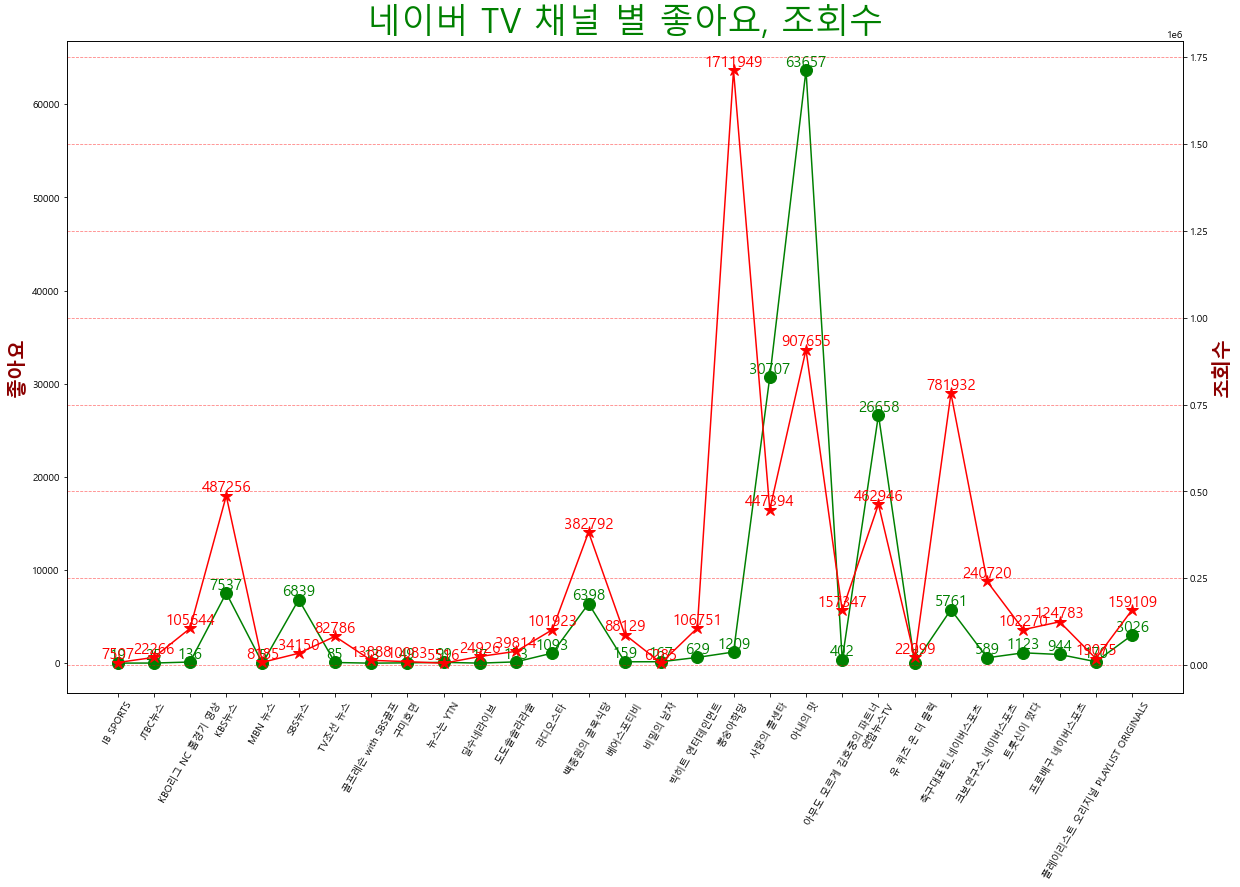

In [119]:
view_sort = byChannel.sort_values(by='View',ascending=False)['View']
like_sort = byChannel.sort_values(by='Like',ascending=False)['Like']
view_max = byChannel.View.max()
cha_num = byChannel.View.count()

fig, ax1 = plt.subplots()

x = byChannel.index
like = byChannel['Like']
view = byChannel['View']

plt.title('네이버 TV 채널 별 좋아요, 조회수', fontdict=font1)
ax1.plot(x, like,  color='green',marker = 'o', markersize=12)

# 글자 45도로 누이기
# ax1.set_xticks(x)
ax1.set_xticklabels(x, rotation=60)
ax1.set_ylabel('좋아요' ,fontdict=font2)
# ax1.set_yticklabels(like_sort[::-3], rotation=45)

for i, v in enumerate(x):
    plt.text(v, like[i], like[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
             color='green',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom') 


ax2 = ax1.twinx()
ax2.plot(x, view, color='red',marker = '*', markersize=12)
ax2.set_xticklabels(x[1:], rotation=45) # 이거 왜 이러지? 왜 [1:]로 해야되지?
# ax2.set_yticklabels(view_sort[::-3], rotation=45) # 이거 하면 더 이상하게 됨
ax2.set_ylabel('조회수', fontdict=font3)

for i, v in enumerate(x):
    plt.text(v, view[i], view[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
             color='red',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom') 



# plt.xticks(np.arange(view_max/cha_num,view_max + view_max/cha_num ,view_max/cha_num),labels = view_sort)
plt.grid(True, color='red', alpha=0.5, linestyle='--')

plt.show()

In [120]:
# byChannel.plot(kind='barh')
# 
# view_sort = byChannel.sort_values(by='View',ascending=True)['View']
# view_max = byChannel.View.max()
# cha_num = byChannel.View.count()
# 
# plt.title('채널 별 좋아요, 조회수', fontdict=font1)
# 
# plt.xticks(np.arange(view_max/cha_num,view_max + view_max/cha_num ,view_max/cha_num),labels = view_sort)
# plt.grid(True, axis='x', color='red', alpha=0.5, linestyle='--')
# 
# plt.show()

In [121]:
df.head()

,Channel,Title,Change,Delta,View,Like
Rank,,,,,,
1,유 퀴즈 온 더 블럭,대학생이 되고 더 업그레이된 무대장악력! Dynamite 무대 공개☆,유지,0,306319,2001
2,아무도 모르게 김호중의 파트너,잠시만 안녕. 김호중 군복무전 마지막 무대 ＜배웅＞ㅣ김호중의파트너 EP.5,유지,0,438467,21624
3,사랑의 콜센타,레전드 무대 예약😍 임영웅 ‘그날들’ ♫,유지,0,366749,26953
4,라디오스타,오자마자 덕담 주고받는 박미선&김구라 😈,유지,0,105425,326
5,트롯신이 떴다,"[신곡 최초 공개] “언제 들어도 좋은 내 당신” 장윤정, 보고만 있어도 ＜좋은 당신＞",상승,2,115915,917


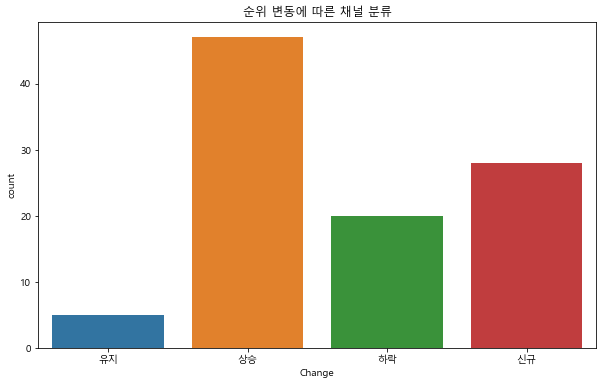

In [131]:
plt.rcParams['figure.figsize'] = [10, 6] 
sns.countplot(x="Change", data=df)
plt.title("순위 변동에 따른 채널 분류")
plt.show()

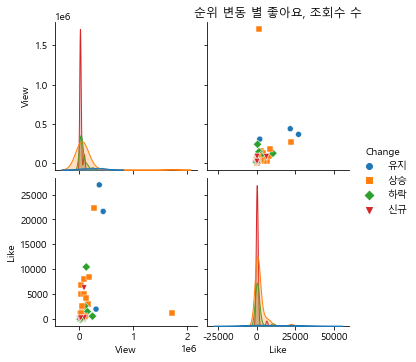

In [153]:
sns.pairplot(df, hue="Change", markers=["o", "s", "D","v"])
# all_shape=['.','o','v','^','>','<','s','p','*','h','H','D', 'd', '', '', '']

plt.title("순위 변동 별 좋아요, 조회수 수")
plt.show()

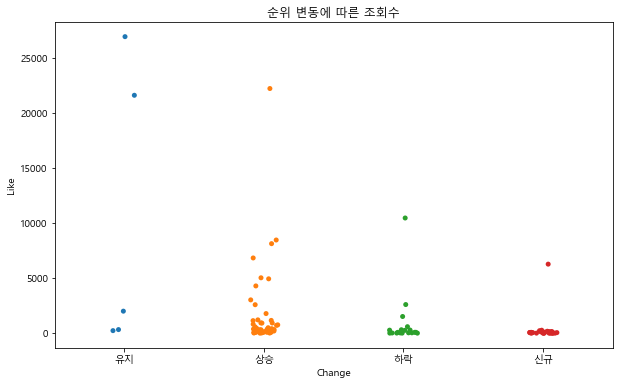

In [152]:
sns.stripplot(x="Change", y="Like", data=df, jitter=True)
plt.title("순위 변동에 따른 조회수")
plt.show()

In [135]:
df.head()

,Channel,Title,Change,Delta,View,Like
Rank,,,,,,
1,유 퀴즈 온 더 블럭,대학생이 되고 더 업그레이된 무대장악력! Dynamite 무대 공개☆,유지,0,306319,2001
2,아무도 모르게 김호중의 파트너,잠시만 안녕. 김호중 군복무전 마지막 무대 ＜배웅＞ㅣ김호중의파트너 EP.5,유지,0,438467,21624
3,사랑의 콜센타,레전드 무대 예약😍 임영웅 ‘그날들’ ♫,유지,0,366749,26953
4,라디오스타,오자마자 덕담 주고받는 박미선&김구라 😈,유지,0,105425,326
5,트롯신이 떴다,"[신곡 최초 공개] “언제 들어도 좋은 내 당신” 장윤정, 보고만 있어도 ＜좋은 당신＞",상승,2,115915,917


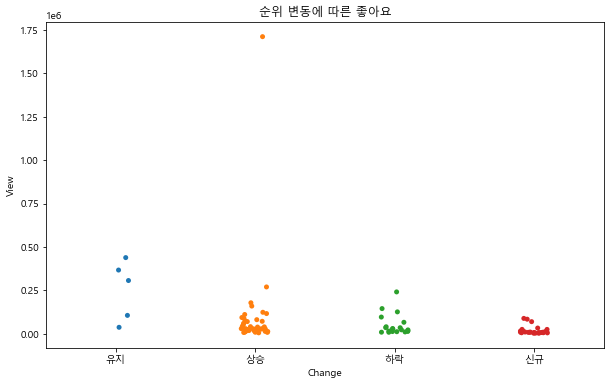

In [151]:
sns.stripplot(x="Change", y="View", data=df, jitter=True)
plt.title("순위 변동에 따른 좋아요")
plt.show()